In [ ]:
import os
import zipfile
import matplotlib.pyplot as plt
import tensorflow as tf
import random
import numpy as np
from shutil import copyfile
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import img_to_array, load_img

In [ ]:
!wget --no-check-certificate \
    "https://github.com/EyeLyze-C241-PR546/Machine-Learning/blob/main/capstone/Zip_bagian1/Data1.zip?raw=true" \
    -O "/tmp/Data1.zip"

--2024-06-03 12:49:58--  https://github.com/EyeLyze-C241-PR546/Machine-Learning/blob/main/capstone/Zip_bagian1/Data1.zip?raw=true
Resolving github.com (github.com)... 140.82.121.3
Connecting to github.com (github.com)|140.82.121.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/EyeLyze-C241-PR546/Machine-Learning/raw/main/capstone/Zip_bagian1/Data1.zip [following]
--2024-06-03 12:49:58--  https://github.com/EyeLyze-C241-PR546/Machine-Learning/raw/main/capstone/Zip_bagian1/Data1.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/EyeLyze-C241-PR546/Machine-Learning/main/capstone/Zip_bagian1/Data1.zip [following]
--2024-06-03 12:49:59--  https://raw.githubusercontent.com/EyeLyze-C241-PR546/Machine-Learning/main/capstone/Zip_bagian1/Data1.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.19

In [ ]:
!wget --no-check-certificate \
    "https://github.com/EyeLyze-C241-PR546/Machine-Learning/blob/main/capstone/Zip_bagian2/Data2.zip?raw=true" \
    -O "/tmp/Data2.zip"

--2024-06-03 12:50:10--  https://github.com/EyeLyze-C241-PR546/Machine-Learning/blob/main/capstone/Zip_bagian2/Data2.zip?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/EyeLyze-C241-PR546/Machine-Learning/raw/main/capstone/Zip_bagian2/Data2.zip [following]
--2024-06-03 12:50:10--  https://github.com/EyeLyze-C241-PR546/Machine-Learning/raw/main/capstone/Zip_bagian2/Data2.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/EyeLyze-C241-PR546/Machine-Learning/main/capstone/Zip_bagian2/Data2.zip [following]
--2024-06-03 12:50:11--  https://raw.githubusercontent.com/EyeLyze-C241-PR546/Machine-Learning/main/capstone/Zip_bagian2/Data2.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.19

In [ ]:
!wget --no-check-certificate \
    "https://github.com/EyeLyze-C241-PR546/Machine-Learning/blob/main/capstone/Zip_bagian3/Data3.zip?raw=true" \
    -O "/tmp/Data3.zip"

--2024-06-03 12:50:17--  https://github.com/EyeLyze-C241-PR546/Machine-Learning/blob/main/capstone/Zip_bagian3/Data3.zip?raw=true
Resolving github.com (github.com)... 140.82.121.4
Connecting to github.com (github.com)|140.82.121.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/EyeLyze-C241-PR546/Machine-Learning/raw/main/capstone/Zip_bagian3/Data3.zip [following]
--2024-06-03 12:50:17--  https://github.com/EyeLyze-C241-PR546/Machine-Learning/raw/main/capstone/Zip_bagian3/Data3.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/EyeLyze-C241-PR546/Machine-Learning/main/capstone/Zip_bagian3/Data3.zip [following]
--2024-06-03 12:50:17--  https://raw.githubusercontent.com/EyeLyze-C241-PR546/Machine-Learning/main/capstone/Zip_bagian3/Data3.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.19

In [ ]:
#Extract Zip
local_zip1 = '/tmp/Data1.zip'
local_zip2 = '/tmp/Data2.zip'
local_zip3 = '/tmp/Data3.zip'
zip_ref1   = zipfile.ZipFile(local_zip1, 'r')
zip_ref2  = zipfile.ZipFile(local_zip2, 'r')
zip_ref3  = zipfile.ZipFile(local_zip3, 'r')
zip_ref1.extractall('/tmp')
zip_ref2.extractall('/tmp')
zip_ref3.extractall('/tmp')
zip_ref1.close()
zip_ref2.close()
zip_ref3.close()

In [ ]:
source_path1 = '/tmp/Data1.zip'
source_path2 = '/tmp/Data2.zip'
source_path3 = '/tmp/Data3.zip'
extract_path = '/tmp/Data'

# Step 1: Extract the contents of the ZIP file
with zipfile.ZipFile(source_path1, 'r') as zip_ref1:
    zip_ref1.extractall(extract_path)
with zipfile.ZipFile(source_path2, 'r') as zip_ref2:
    zip_ref2.extractall(extract_path)
with zipfile.ZipFile(source_path3, 'r') as zip_ref3:
    zip_ref3.extractall(extract_path)

# Step 2: Construct the paths to each category
source_path_catarct = os.path.join(extract_path, 'catarct')
source_path_conjunctivitis = os.path.join(extract_path, 'conjunctivitis')
source_path_normal = os.path.join(extract_path, 'normal')
source_path_pterygium = os.path.join(extract_path, 'pterygium')

# Step 3: List the files in each directory and print the counts
print(f"There are {len(os.listdir(source_path_catarct))} images of Cataract.")
print(f"There are {len(os.listdir(source_path_conjunctivitis))} images of Conjunctivitis.")
print(f"There are {len(os.listdir(source_path_normal))} images of Normal.")
print(f"There are {len(os.listdir(source_path_pterygium))} images of Pterygium.")

There are 93 images of Cataract.
There are 175 images of Conjunctivitis.
There are 201 images of Normal.
There are 170 images of Pterygium.


In [ ]:
import shutil

# Define root directory
root_dir = '/tmp/Data-train-test'

# Empty directory to prevent FileExistsError is the function is run several times
if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

# create_train_test_dirs
def create_train_test_dirs(root_path):
  training_path = 'training'
  testing_path = 'testing'
  catarct_path = 'catarct'
  conjunctivitis_path = 'conjunctivitis'
  normal_path = 'normal'
  path_arr = [testing_path, training_path]
  path_arr2 = [catarct_path, conjunctivitis_path, normal_path]

  try:
    for path1 in path_arr:
      path_first = os.path.join(root_path, path1)
      if os.path.isdir(path_first):
        break
      os.makedirs(path_first)
      for path2 in path_arr2:
        path_second = os.path.join(path_first, path2)
        if os.path.isdir(path_second):
          break
        os.makedirs(path_second)
  except OSError:
    pass


try:
  create_train_test_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

In [ ]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  list_file = []
  for filename in os.listdir(SOURCE):
    path = SOURCE + filename
    if os.path.getsize(path) > 0:
      list_file.append(filename)
    else:
      print("{} is zero length, so ignoring.".format(filename))

  number_of_files = len(list_file)
  split = int(number_of_files * SPLIT_SIZE)

  shuffle = random.sample(list_file, number_of_files)
  train_file = shuffle[:split]
  test_file = shuffle[split:]

  for filename in train_file:
    copyfile(SOURCE + filename, TRAINING + filename)
  for filename in test_file:
    copyfile(SOURCE + filename, TESTING + filename)

In [ ]:
# Test your split_data function

# Define paths
CATARCT_SOURCE_DIR = "/tmp/Data/catarct/"
CONJUNCTIVITIS_SOURCE_DIR = "/tmp/Data/conjunctivitis/"
NORMAL_SOURCE_DIR = "/tmp/Data/normal/"

TRAINING_DIR = "/tmp/Data-train-test/training/"
TESTING_DIR = "/tmp/Data-train-test/testing/"

TRAINING_CATARCT_DIR = os.path.join(TRAINING_DIR, "catarct/")
TESTING_CATARCT_DIR = os.path.join(TESTING_DIR, "catarct/")

TRAINING_CONJUNCTIVITIS_DIR = os.path.join(TRAINING_DIR, "conjunctivitis/")
TESTING_CONJUNCTIVITIS_DIR = os.path.join(TESTING_DIR, "conjunctivitis/")

TRAINING_NORMAL_DIR = os.path.join(TRAINING_DIR, "normal/")
TESTING_NORMAL_DIR = os.path.join(TESTING_DIR, "normal/")

In [ ]:

# Empty directories in case you run this cell multiple times
if len(os.listdir(TRAINING_CATARCT_DIR)) > 0:
  for file in os.scandir(TRAINING_CATARCT_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_CONJUNCTIVITIS_DIR)) > 0:
  for file in os.scandir(TRAINING_CONJUNCTIVITIS_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_NORMAL_DIR)) > 0:
  for file in os.scandir(TRAINING_NORMAL_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_CATARCT_DIR)) > 0:
  for file in os.scandir(TESTING_CATARCT_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_CONJUNCTIVITIS_DIR)) > 0:
  for file in os.scandir(TESTING_CONJUNCTIVITIS_DIR):
    os.remove(file.path)
if len(os.listdir(TESTING_NORMAL_DIR)) > 0:
  for file in os.scandir(TESTING_NORMAL_DIR):
    os.remove(file.path)

# Define proportion of images used for training
split_size = .8

# Run the function
# NOTE: Messages about zero length images should be printed out
split_data(CATARCT_SOURCE_DIR, TRAINING_CATARCT_DIR, TESTING_CATARCT_DIR, split_size)
split_data(CONJUNCTIVITIS_SOURCE_DIR, TRAINING_CONJUNCTIVITIS_DIR, TESTING_CONJUNCTIVITIS_DIR, split_size)
split_data(NORMAL_SOURCE_DIR, TRAINING_NORMAL_DIR, TESTING_NORMAL_DIR, split_size)

print(f"There are {len(os.listdir(TRAINING_CATARCT_DIR))} images of catarct for training")
print(f"There are {len(os.listdir(TRAINING_CONJUNCTIVITIS_DIR))} images of conjunctivitis for training")
print(f"There are {len(os.listdir(TRAINING_NORMAL_DIR))} images of normal for training")

print(f"There are {len(os.listdir(TESTING_CATARCT_DIR))} images of catarct for testing")
print(f"There are {len(os.listdir(TESTING_CONJUNCTIVITIS_DIR))} images of conjunctivitis for testing")
print(f"There are {len(os.listdir(TESTING_NORMAL_DIR))} images of normal for testing")

There are 74 images of catarct for training
There are 140 images of conjunctivitis for training
There are 160 images of normal for training
There are 19 images of catarct for testing
There are 35 images of conjunctivitis for testing
There are 41 images of normal for testing


In [ ]:
# Download the inception v3 weights
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5 \
    -O /tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5

--2024-06-03 12:50:58--  https://storage.googleapis.com/mledu-datasets/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.143.207, 173.194.69.207, 173.194.79.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.143.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 87910968 (84M) [application/x-hdf]
Saving to: ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’

/tmp/inception_v3_w 100%[===================>]  83.84M  31.8MB/s    in 2.6s    

2024-06-03 12:51:00 (31.8 MB/s) - ‘/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5’ saved [87910968/87910968]



In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3

# Create an instance of the inception model from the local pre-trained weights
local_weights_file = '/tmp/inception_v3_weights_tf_dim_ordering_tf_kernels_notop.h5'

In [ ]:
def create_pre_trained_model(local_weights_file):
  pre_trained_model = InceptionV3(input_shape = (150, 150, 3),
                                  include_top = False,
                                  weights = None)

  pre_trained_model.load_weights(local_weights_file)

  from tensorflow.keras import layers
  for layer in pre_trained_model.layers:
    layer.trainable = False

  return pre_trained_model

In [ ]:
pre_trained_model = create_pre_trained_model(local_weights_file)

# Print the model summary
pre_trained_model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_2 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d_94 (Conv2D)          (None, 74, 74, 32)           864       ['input_2[0][0]']             
                                                                                                  
 batch_normalization_94 (Ba  (None, 74, 74, 32)           96        ['conv2d_94[0][0]']           
 tchNormalization)                                                                                
                                                                                                  
 activation_94 (Activation)  (None, 74, 74, 32)           0         ['batch_normalizati

In [ ]:
total_params = pre_trained_model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in pre_trained_model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 21,802,784 total parameters in this model.
There are 0 trainable parameters in this model.


In [ ]:
def output_of_last_layer(pre_trained_model):
  last_desired_layer = pre_trained_model.get_layer('mixed7')
  print('last layer output shape: ', last_desired_layer.output_shape)
  last_output = last_desired_layer.output
  print('last layer output: ', last_output)

  return last_output

In [ ]:
last_output = output_of_last_layer(pre_trained_model)

last layer output shape:  (None, 7, 7, 768)
last layer output:  KerasTensor(type_spec=TensorSpec(shape=(None, 7, 7, 768), dtype=tf.float32, name=None), name='mixed7/concat:0', description="created by layer 'mixed7'")


In [ ]:
# Print the type of the pre-trained model
print(f"The pretrained model has type: {type(pre_trained_model)}")

The pretrained model has type: <class 'keras.src.engine.functional.Functional'>


In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  train_datagen = ImageDataGenerator(rescale = 1.0/255,
                                     rotation_range=40,
                                     width_shift_range=0.2,
                                     height_shift_range=0.2,
                                     shear_range=0.2,
                                     zoom_range=0.2,
                                     horizontal_flip=True,
                                     vertical_flip=True)

  # Pass in the appropiate arguments to the flow_from_directory method
  train_generator = train_datagen.flow_from_directory(directory=TRAINING_DIR,
                                                      batch_size=20,
                                                      class_mode='categorical',
                                                      target_size=(150, 150))

  # Instantiate the ImageDataGenerator class (don't forget to set the rescale argument)
  validation_datagen = ImageDataGenerator(rescale = 1.0/255.)

  # Pass in the appropiate arguments to the flow_from_directory method
  validation_generator = validation_datagen.flow_from_directory(directory=VALIDATION_DIR,
                                                                batch_size=11,
                                                                class_mode='categorical',
                                                                target_size=(150, 150))
  return train_generator, validation_generator


In [ ]:
# Test your generators
train_generator, validation_generator = train_val_generators(TRAINING_DIR, TESTING_DIR)

Found 374 images belonging to 3 classes.
Found 95 images belonging to 3 classes.


In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.optimizers import RMSprop
def create_final_model(pre_trained_model, last_output):
  x = layers.Flatten()(last_output)

  x = layers.Dense(1024, activation='relu')(x)
  x = layers.Dropout(0.5)(x)
  x = layers.Dense(3, activation='softmax')(x)

  from tensorflow.keras.optimizers import RMSprop
  from tensorflow.keras import Model

  model = Model(pre_trained_model.input, x)

  model.compile(optimizer = RMSprop(learning_rate=0.0001),
                loss = 'categorical_crossentropy',
                metrics = ['accuracy'])

  return model

In [ ]:
# Define a Callback class that stops training once accuracy reaches 99.9%
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('val_accuracy')>0.88 and logs.get('accuracy')>0.88):
      print("\nReached 83% accuracy so cancelling training!")
      self.model.stop_training = True

In [ ]:
# Save your model in a variable
model = create_final_model(pre_trained_model, last_output)

# Inspect parameters
total_params = model.count_params()
num_trainable_params = sum([w.shape.num_elements() for w in model.trainable_weights])

print(f"There are {total_params:,} total parameters in this model.")
print(f"There are {num_trainable_params:,} trainable parameters in this model.")

There are 47,514,531 total parameters in this model.
There are 38,539,267 trainable parameters in this model.


In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 150, 150, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 74, 74, 32)           864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 74, 74, 32)           96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 74, 74, 32)           0         ['batch_normalization[0][0

In [ ]:
callbacks = myCallback()
history = model.fit(train_generator,
                    validation_data = validation_generator,
                    epochs = 50,
                    verbose = 1)

Epoch 1/50
19/19 [==============================] - 11s 429ms/step - loss: 1.2564 - accuracy: 0.5615 - val_loss: 0.8481 - val_accuracy: 0.6000
Epoch 2/50
19/19 [==============================] - 4s 197ms/step - loss: 0.7108 - accuracy: 0.6898 - val_loss: 0.7539 - val_accuracy: 0.6737
Epoch 3/50
19/19 [==============================] - 5s 263ms/step - loss: 0.6147 - accuracy: 0.7513 - val_loss: 0.8988 - val_accuracy: 0.5895
Epoch 4/50
19/19 [==============================] - 4s 200ms/step - loss: 0.6275 - accuracy: 0.7139 - val_loss: 0.4505 - val_accuracy: 0.8421
Epoch 5/50
19/19 [==============================] - 4s 203ms/step - loss: 0.4343 - accuracy: 0.8209 - val_loss: 0.9080 - val_accuracy: 0.6316
Epoch 6/50
19/19 [==============================] - 5s 237ms/step - loss: 0.4817 - accuracy: 0.8128 - val_loss: 0.4401 - val_accuracy: 0.8526
Epoch 7/50
19/19 [==============================] - 4s 196ms/step - loss: 0.4090 - accuracy: 0.8717 - val_loss: 0.4803 - val_accuracy: 0.7789
Epoch

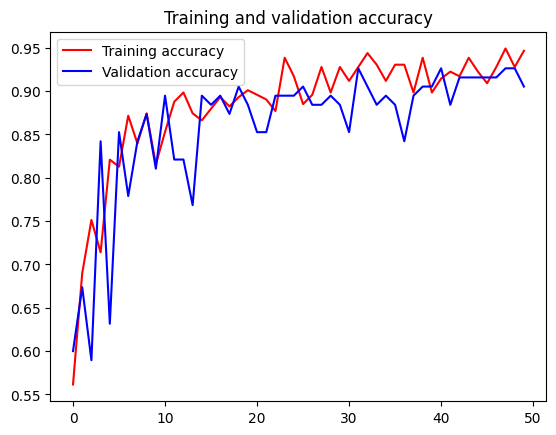

<Figure size 640x480 with 0 Axes>

In [ ]:
import matplotlib.pyplot as plt

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

In [1]:
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():

  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(150, 150))
  x = image.img_to_array(img)
  x /= 255
  x = np.expand_dims(x, axis=0)

  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  print("catarct ")
  print(classes[0][0])
  print("conjunctivitis ")
  print(classes[0][1])
  print("normal eye ")
  print(classes[0][2])

In [ ]:
import numpy as np
from sklearn.metrics import f1_score, classification_report

# Membuat prediksi pada data validasi
predictions = model.predict(validation_generator)
predicted_labels = np.argmax(predictions, axis=1)

true_labels = validation_generator.classes

# Menghitung skor F1
f1 = f1_score(true_labels, predicted_labels, average='weighted')

print(f'F1 Score: {f1}')

9/9 [==============================] - 1s 114ms/step
F1 Score: 0.4354607348102321


In [ ]:
print(classification_report(true_labels, predicted_labels))

              precision    recall  f1-score   support

           0       0.35      0.32      0.33        19
           1       0.40      0.34      0.37        35
           2       0.50      0.59      0.54        41

    accuracy                           0.44        95
   macro avg       0.42      0.41      0.41        95
weighted avg       0.43      0.44      0.44        95

